<a href="https://colab.research.google.com/github/MeenakshiMony/Bank_Marketing_Campaign_Analysis/blob/main/Bank_Marketing_Campaign_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [2]:
df = pd.read_csv("/content/bank.csv", delimiter=",")

In [3]:
print("The shape is:", df.shape)
print("The column types are:\n", df.dtypes)

The shape is: (11162, 17)
The column types are:
 age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
deposit      object
dtype: object


In [4]:
cat = []
num = []

for col in df.columns:
    if df[col].dtypes == "object":
        cat.append(col)
    else:
        num.append(col)

print("Categorical Features:", cat)
print("Numerical Features:", num)


Categorical Features: ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'deposit']
Numerical Features: ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']


4


<ipython-input-5-13f07b3cb341>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=cx, data=df, palette="Set2")
<ipython-input-5-13f07b3cb341>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=cx, data=df, palette="Set2")
<ipython-input-5-13f07b3cb341>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=cx, data=df, palette="Set2")
<ipython-input-5-13f07b3cb341>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same 

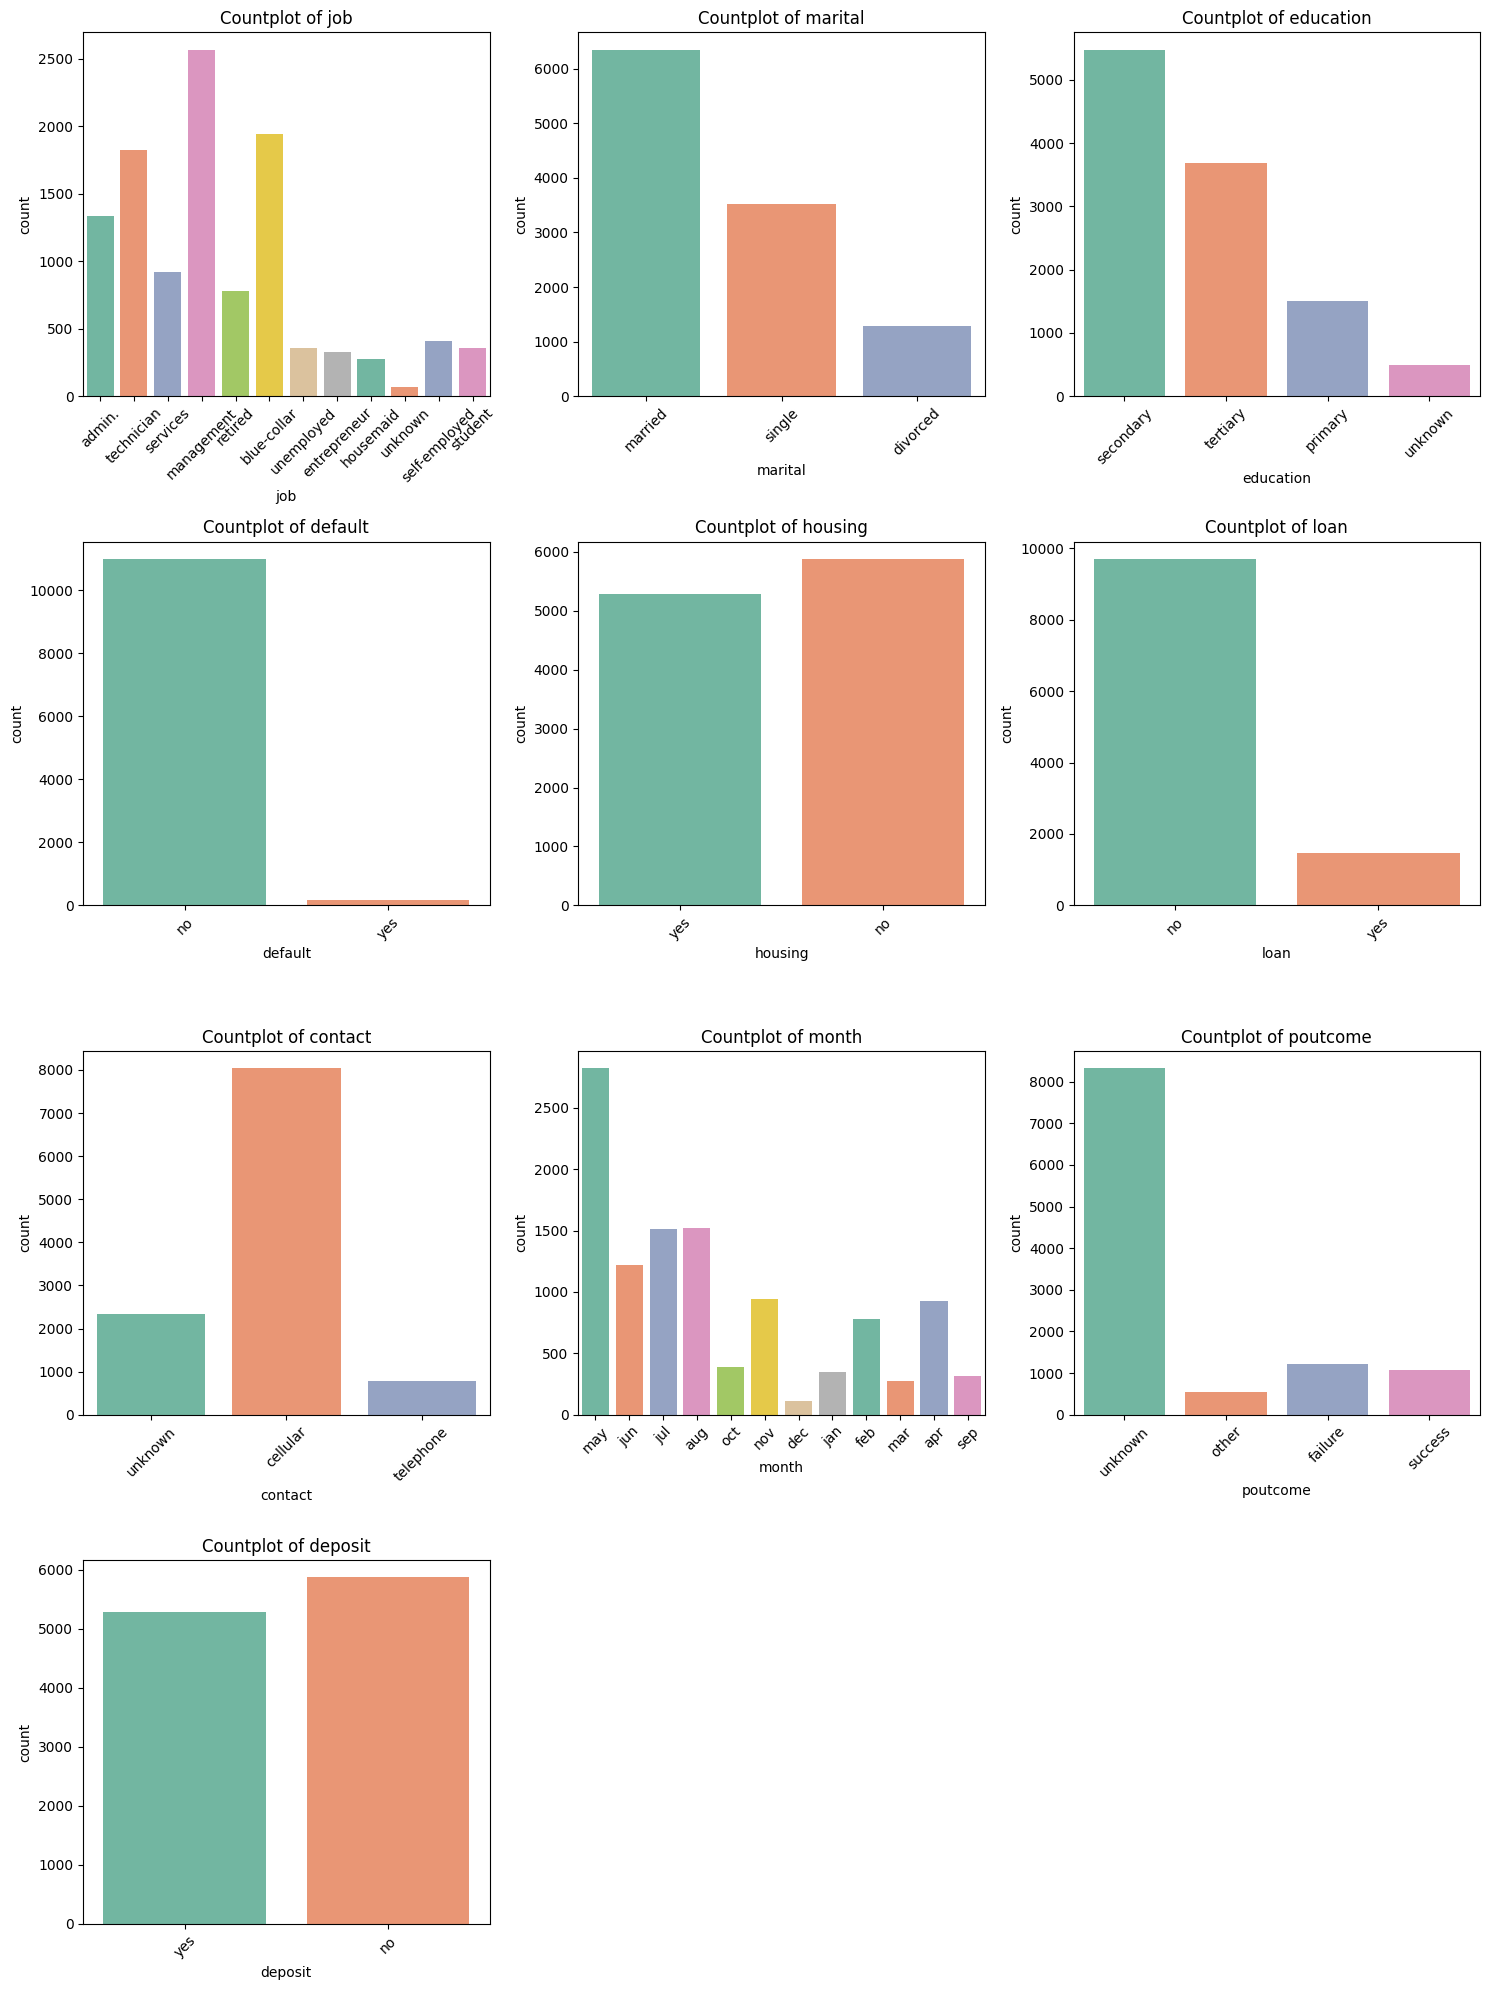

In [5]:
c = len(cat)
rows = (c // 3) + (c % 3 > 0)
print(rows)

plt.figure(figsize=(15,5*rows))

for i, cx in enumerate(cat, start=1):
    plt.subplot(rows, 3, i)
    sns.countplot(x=cx, data=df, palette="Set2")
    plt.title(f"Countplot of {cx}")
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

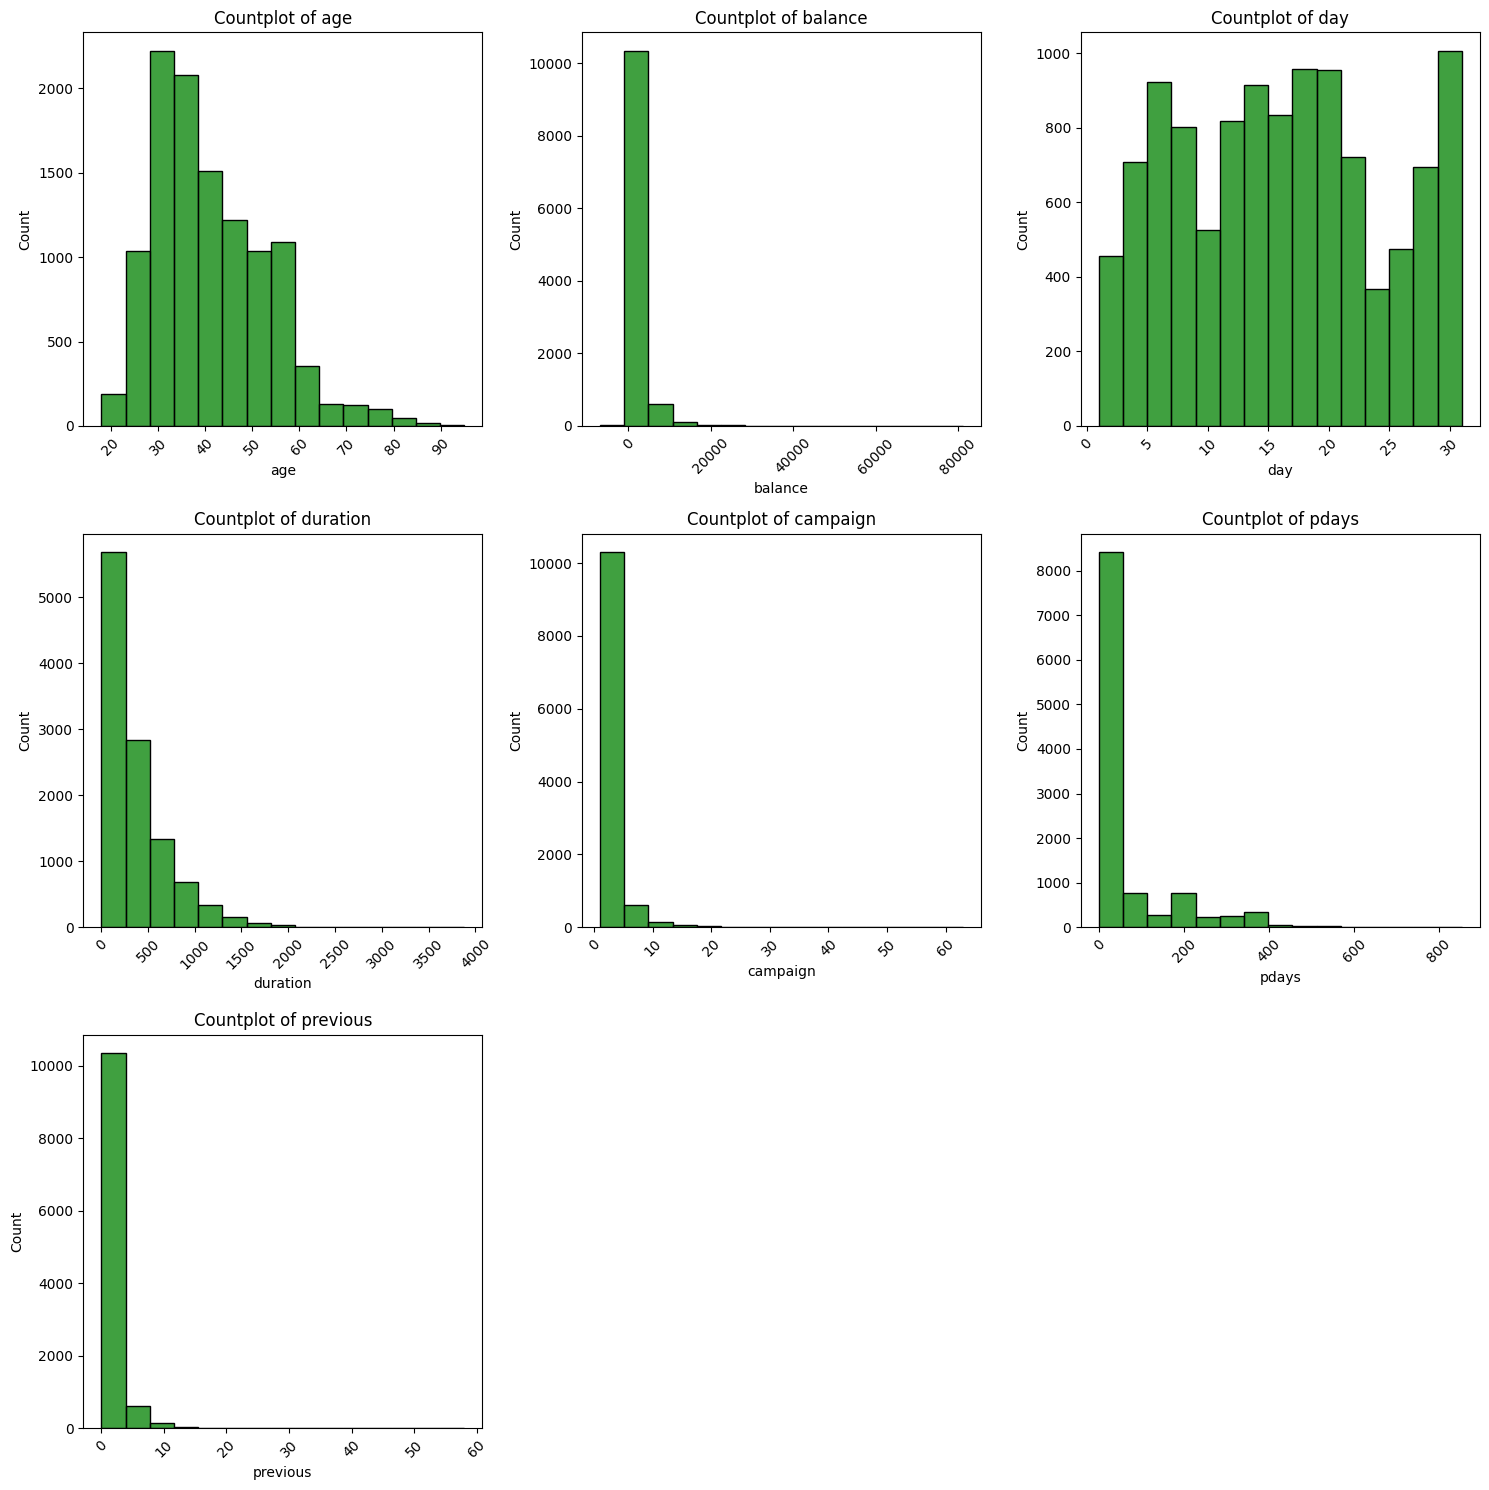

In [6]:
n = len(num)
nrows = (n // 3) + (n % 3 > 0)

plt.figure(figsize=(15,5*nrows))

for i,nx in enumerate(num, start=1):
    plt.subplot(nrows, 3, i)
    sns.histplot(x=nx, data=df, bins=15, color="green", kde=False)
    plt.title(f"Countplot of {nx}")
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [7]:
missing = df.isnull().sum()
print("Missing Values:\n", missing[missing > 0])


Missing Values:
 Series([], dtype: int64)


In [8]:
df_encoded = pd.get_dummies(df, columns=cat, drop_first=True)
print(df_encoded.head())

   age  balance  day  duration  campaign  pdays  previous  job_blue-collar  \
0   59     2343    5      1042         1     -1         0            False   
1   56       45    5      1467         1     -1         0            False   
2   41     1270    5      1389         1     -1         0            False   
3   55     2476    5       579         1     -1         0            False   
4   54      184    5       673         2     -1         0            False   

   job_entrepreneur  job_housemaid  ...  month_jun  month_mar  month_may  \
0             False          False  ...      False      False       True   
1             False          False  ...      False      False       True   
2             False          False  ...      False      False       True   
3             False          False  ...      False      False       True   
4             False          False  ...      False      False       True   

   month_nov  month_oct  month_sep  poutcome_other  poutcome_success  \
0 

In [9]:
X = df_encoded.drop('deposit_yes', axis=1)
Y = df_encoded['deposit_yes']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.2, random_state=42, stratify=Y
)

print("Training set:", X_train.shape)
print("Test set:", X_test.shape)

Training set: (8929, 42)
Test set: (2233, 42)


In [12]:
# Initialize Decision Tree Classifier
dt_model = DecisionTreeClassifier(random_state=42)

# Train the model
dt_model.fit(X_train, y_train)

# Prediction on test set
y_pred = dt_model.predict(X_test)

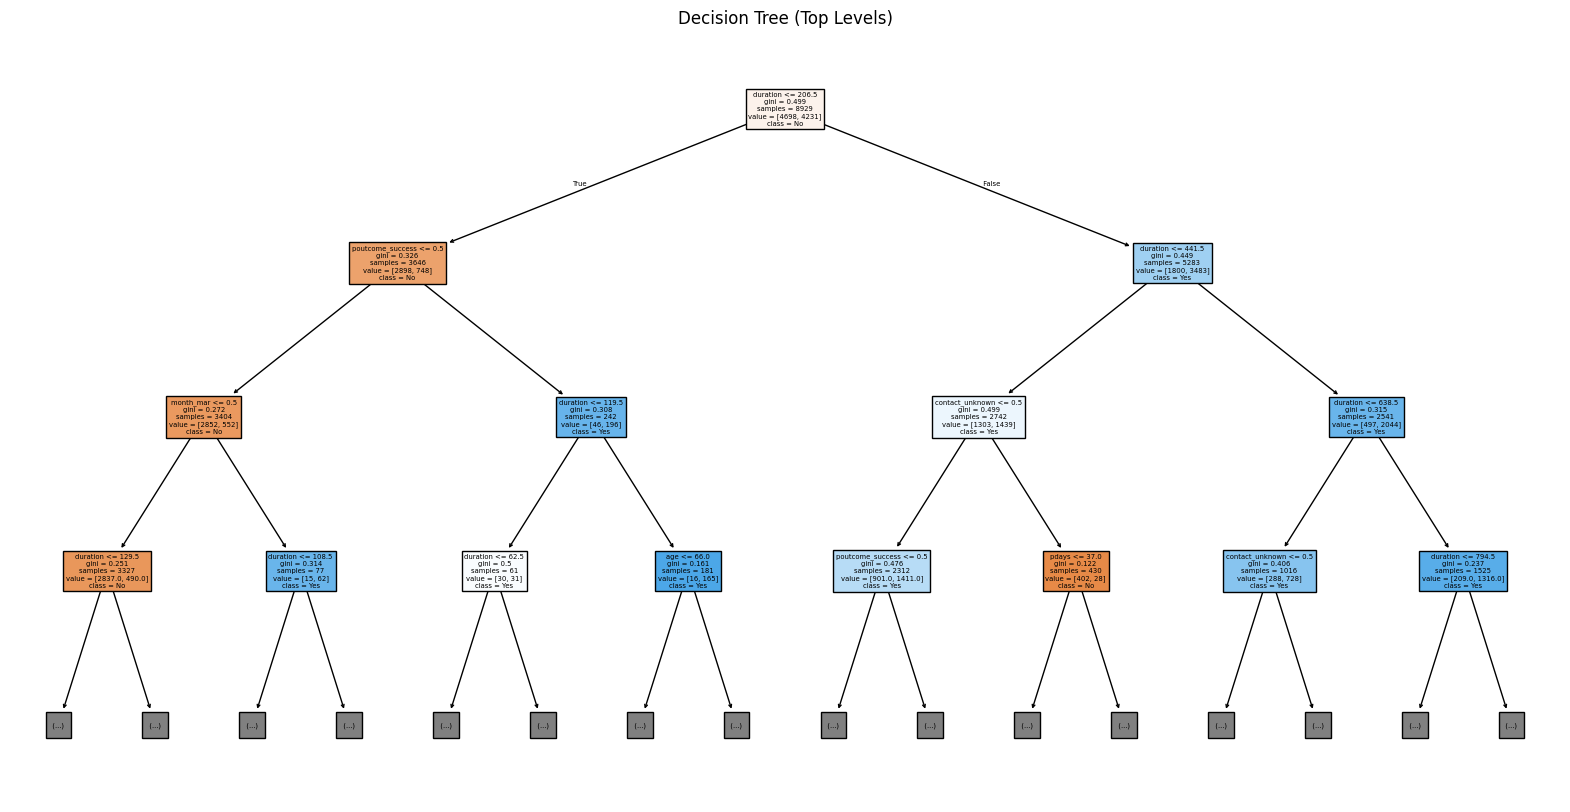

In [13]:
# Plot the decision tree (only top 3 levels to avoid clutter)
plt.figure(figsize=(20,10))
plot_tree(
    dt_model,
    filled=True,
    feature_names=X.columns,
    class_names=["No", "Yes"],
    max_depth=3  # This limits the plot to top 3 levels
)
plt.title("Decision Tree (Top Levels)")
plt.show()

In [14]:
# Save the plot
plt.savefig("decision_tree_top_levels.png", dpi=300, bbox_inches='tight')

<Figure size 640x480 with 0 Axes>

<ipython-input-15-d304aea40bb7>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances_sorted[:15], y=importances_sorted.index[:15], palette="coolwarm")


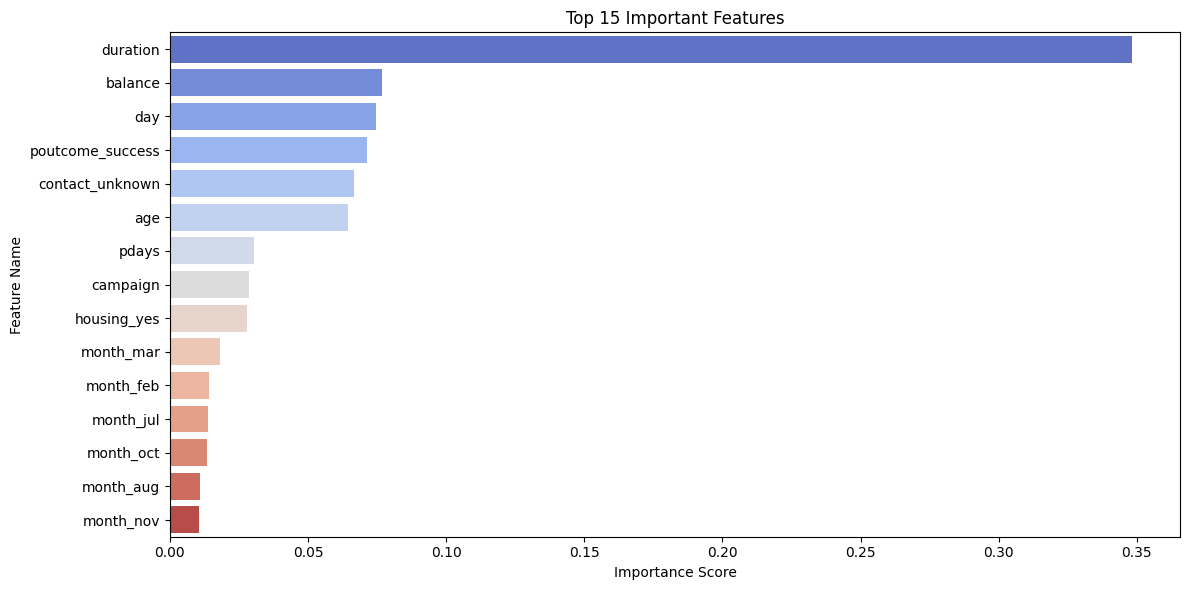

In [15]:
# Get feature importances from the trained model
importances = pd.Series(dt_model.feature_importances_, index=X.columns)

# Sort them in descending order
importances_sorted = importances.sort_values(ascending=False)

# Plot the top 15 important features
plt.figure(figsize=(12,6))
sns.barplot(x=importances_sorted[:15], y=importances_sorted.index[:15], palette="coolwarm")
plt.title("Top 15 Important Features")
plt.xlabel("Importance Score")
plt.ylabel("Feature Name")
plt.tight_layout()
plt.show()

Train Accuracy: 1.0000
Test Accuracy: 0.7922

Classification Report:
               precision    recall  f1-score   support

       False       0.80      0.81      0.80      1175
        True       0.79      0.77      0.78      1058

    accuracy                           0.79      2233
   macro avg       0.79      0.79      0.79      2233
weighted avg       0.79      0.79      0.79      2233



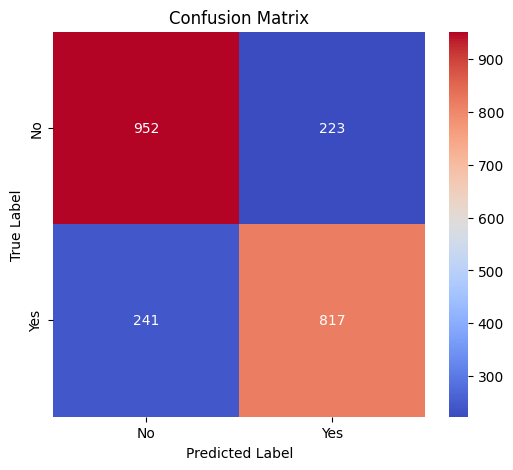

In [16]:
# Get predictions
y_pred_train = dt_model.predict(X_train)
y_pred_test = dt_model.predict(X_test)

# Accuracy Scores
train_acc = accuracy_score(y_train, y_pred_train)
test_acc = accuracy_score(y_test, y_pred_test)

print(f"Train Accuracy: {train_acc:.4f}")
print(f"Test Accuracy: {test_acc:.4f}")

# Detailed Classification Report
print("\nClassification Report:\n", classification_report(y_test, y_pred_test))

# Confusion Matrix
plt.figure(figsize=(6,5))
sns.heatmap(confusion_matrix(y_test, y_pred_test), annot=True, fmt="d", cmap="coolwarm", xticklabels=["No", "Yes"], yticklabels=["No", "Yes"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [17]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'max_depth': [3, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5]
}

# Initialize Decision Tree
dt = DecisionTreeClassifier(random_state=42)

# Perform Grid Search
grid_search = GridSearchCV(dt, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best Parameters
print("Best Parameters:", grid_search.best_params_)

# Train the optimized model
dt_best = grid_search.best_estimator_
dt_best.fit(X_train, y_train)

# New predictions
y_pred_test_best = dt_best.predict(X_test)

# New Accuracy
test_acc_best = accuracy_score(y_test, y_pred_test_best)
print(f"Optimized Test Accuracy: {test_acc_best:.4f}")


Best Parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}
Optimized Test Accuracy: 0.8222
